In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import os



In [2]:
url = 'C:/Users/user/Documents/Temporary data sets for practise only/books.csv'
column_names = ['bookID','title','authors','average_rating','isbn','isbn13','language_code','# num_pages','ratings_count','text_reviews_count']
df = pd.read_csv (url,delimiter = ',',usecols = column_names)


We perform some EDA (Exploratory Data Analysis) to find out how our data looks and what it contains

In [3]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [4]:
df.describe()

,bookID,ratings_count,text_reviews_count
count,13719.000000,1.371900e+04,13719.000000
mean,22160.579270,1.775903e+04,533.606385
std,13699.603351,1.129371e+05,2528.600316
min,1.000000,0.000000e+00,0.000000
25%,10621.000000,8.300000e+01,7.000000
50%,21322.000000,6.300000e+02,40.000000
75%,33322.000000,4.737000e+03,222.000000
max,47709.000000,5.629932e+06,93619.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13719 entries, 0 to 13718
Data columns (total 10 columns):
bookID                13719 non-null int64
title                 13719 non-null object
authors               13719 non-null object
average_rating        13719 non-null object
isbn                  13719 non-null object
isbn13                13719 non-null object
language_code         13719 non-null object
# num_pages           13719 non-null object
ratings_count         13719 non-null int64
text_reviews_count    13719 non-null int64
dtypes: int64(3), object(7)
memory usage: 1.0+ MB


In [6]:
print('Dataset contains {} row and {} columns'.format(df.shape[0],df.shape[1]))

Dataset contains 13719 row and 10 columns


We can conclude that our data has no null entries, no missing data because as per the shape all the 10 columns and respective 13719 rows contain data

In [7]:
df['title'].count()

13719

In [8]:
'''we check the data types'''
df.dtypes


bookID                 int64
title                 object
authors               object
average_rating        object
isbn                  object
isbn13                object
language_code         object
# num_pages           object
ratings_count          int64
text_reviews_count     int64
dtype: object

In [9]:
# before we perform below analysis we need to check the tail as there seems to be some invalid data
df.tail()
df['average_rating'].dtypes

dtype('O')

In [10]:
df['average_rating'] = pd.to_numeric(df['average_rating'],errors = 'coerce')
#there are some str values in the average_rating column thus the coerce argument, don't do it otherwise

In [11]:
df['# num_pages'] = pd.to_numeric(df['# num_pages'], errors = 'coerce')

In [12]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                 object
language_code          object
# num_pages           float64
ratings_count           int64
text_reviews_count      int64
dtype: object

In [13]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652.0,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870.0,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320.0,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352.0,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435.0,2149872,33964


In [14]:
df.tail(20)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
13699,47645,Lirael (Abhorsen #2),Garth Nix,4.30,0060005424,9780060005429,en-CA,705.0,3325,351
13700,47648,Abhorsen: La novena puerta (The Abhorsen Trilo...,Garth Nix,4.27,8478715088,9788478715084,spa,315.0,13,2
13701,47649,Point Clear,Jennifer Paddock,3.14,0743287827,9780743287821,eng,240.0,179,32
13702,47658,Lake Forest: Estates People and Culture (Imag...,Arthur H. Miller-Shirley M. Paddock,3.33,0738507938,9780738507934,eng,128.0,2,0
13703,47660,Rebeca,Daphne du Maurier,4.22,840146272X,9788401462726,spa,544.0,67,8
13704,47666,Abhorsen (Abhorsen #3),Garth Nix,4.27,0007137354,9780007137350,en-GB,396.0,1830,156
13705,47667,Seeing,José Saramago-Margaret Jull Costa,3.79,0156032732,9780156032735,eng,307.0,8480,625
13706,47668,Ensayo sobre la ceguera,José Saramago,4.11,9707311150,9789707311152,spa,329.0,10296,686
13707,47674,Papa Please Get the Moon for Me,Eric Carle,4.15,0887081770,9780887081774,eng,40.0,4359,209
13708,47683,The Cinderella Pact,Sarah Strohmeyer-Katarína Repatá,3.71,0525949577,9780525949572,eng,304.0,10322,616


In [15]:
inval = df[df['average_rating'] <= 0]

In [16]:
print(inval.shape)

(34, 10)


In [17]:
# as we can see above only 34 entries contain the <=0 entries including the entries  that we coerced hence we can drop those 
# without significant loss or effect on our analysis.

In [18]:
df = df.drop (inval.index, axis = 0)

In [19]:
df.shape

(13685, 10)

In [20]:
# we've dropped the columns that had the invalid enties on the 'average_rating' column we can counter check this as our original df had 
# 13719 rows and now we have 13685, do the math

In [21]:
# we also corced some values on the '# num_pages' column hence we need to check and clean that as well

inval2 = df[df['# num_pages']<=0]
df = df.drop(inval2.index, axis = 0)


In [22]:
df.shape

(13600, 10)

In [23]:
# now we have a dataframe we can  perform some analysis.

In [24]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652.0,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870.0,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320.0,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352.0,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435.0,2149872,33964


In [25]:
dupllicateddf = df[df.duplicated('bookID')]

In [26]:
print (dupllicateddf.shape)

(0, 10)


In [27]:
#since there are no duplicate values in the 'bookID' column we can use it as the index
df.set_index('bookID', inplace = True)

In [28]:
df.head()

,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652.0,1944099,26249
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870.0,1996446,27613
3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320.0,5629932,70390
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352.0,6267,272
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435.0,2149872,33964


In [29]:
print(df['authors'].unique())

['J.K. Rowling-Mary GrandPré' 'J.K. Rowling' 'W. Frederick Zimmerman' ...
 'Neil Gaiman-Michael Reaves' 'Brian Froud-Jessica Macbeth' 'Brian Froud']


In [30]:
inval3 = df[df['ratings_count']<=0]

In [31]:
inval3.shape

(79, 9)

In [32]:
df = df.drop(inval3.index, axis = 0)

In [33]:
print('Dataset contains {} row and {} columns'.format(df.shape[0],df.shape[1]))

Dataset contains 13521 row and 9 columns


In [34]:
df.to_csv ('C:/Users/user/Documents/Temporary data sets for practise only/booksclean.csv')
# we've a cleaner dataset now we can do a good deed an re-upload to kaggle where we got the original data from

In [35]:
# for our analysis we need to format the authors column as we've seen there is 'J.K. Rowling-Mary GrandPré' and 'J.K. Rowling'
# replace with only J.K. Rowling
df.replace(to_replace = 'J.K. Rowling-Mary GrandPré', value = 'J.K. Rowling', inplace = True )

In [36]:
df.head()

,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.56,0439785960,9780439785969,eng,652.0,1944099,26249
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,0439358078,9780439358071,eng,870.0,1996446,27613
3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.47,0439554934,9780439554930,eng,320.0,5629932,70390
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352.0,6267,272
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.55,043965548X,9780439655484,eng,435.0,2149872,33964


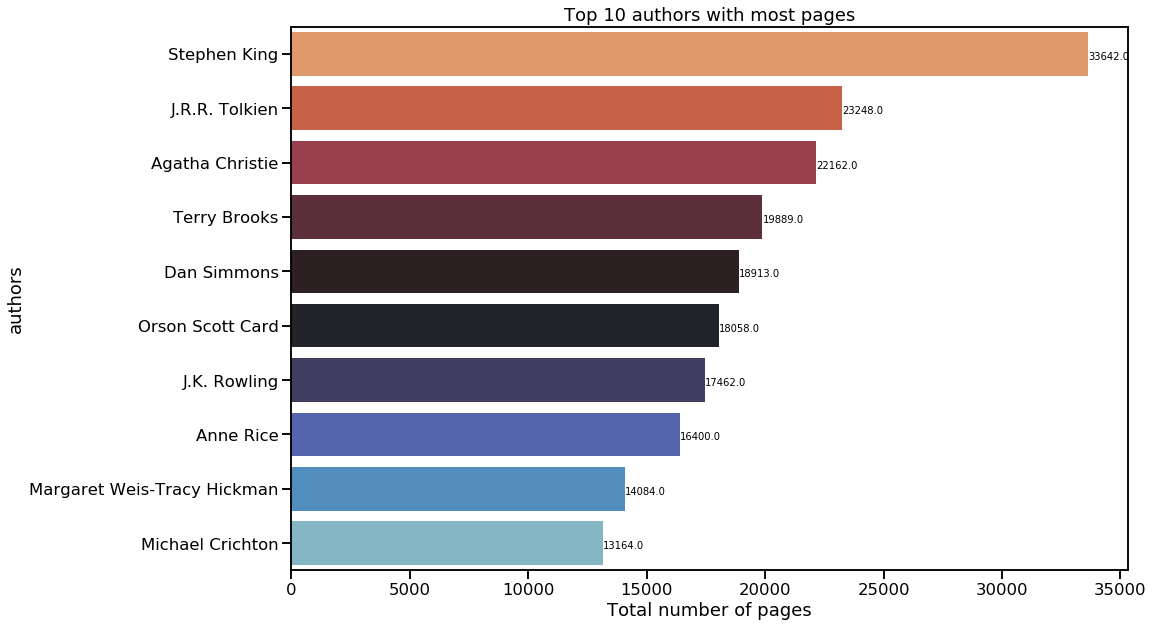

In [37]:
# we can check the authors with the most pages.

sns.set_context('talk')
most_pages = df.groupby('authors')['# num_pages'].sum().reset_index().sort_values('# num_pages', ascending = False).head(10).set_index('authors')

plt.figure(figsize=(15,10))
ax = sns.barplot(most_pages['# num_pages'], most_pages.index, palette='icefire_r')
ax.set_title("Top 10 authors with most pages")
ax.set_xlabel("Total number of pages")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

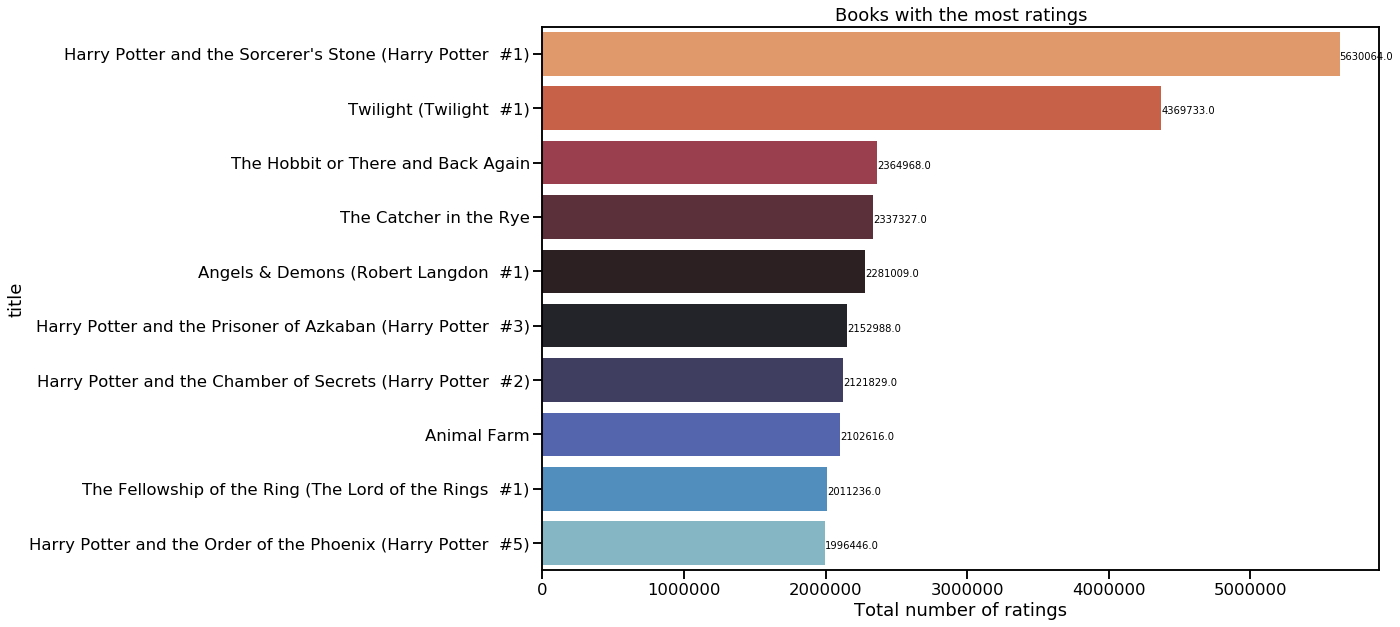

In [38]:
# we can also check for the books with the most ratings count

sns.set_context('talk')
most_pages = df.groupby('title')['ratings_count'].sum().reset_index().sort_values('ratings_count', ascending = False).head(10).set_index('title')

plt.figure(figsize=(15,10))
ax = sns.barplot(most_pages['ratings_count'], most_pages.index, palette='icefire_r')
ax.set_title("Books with the most ratings")
ax.set_xlabel("Total number of ratings")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

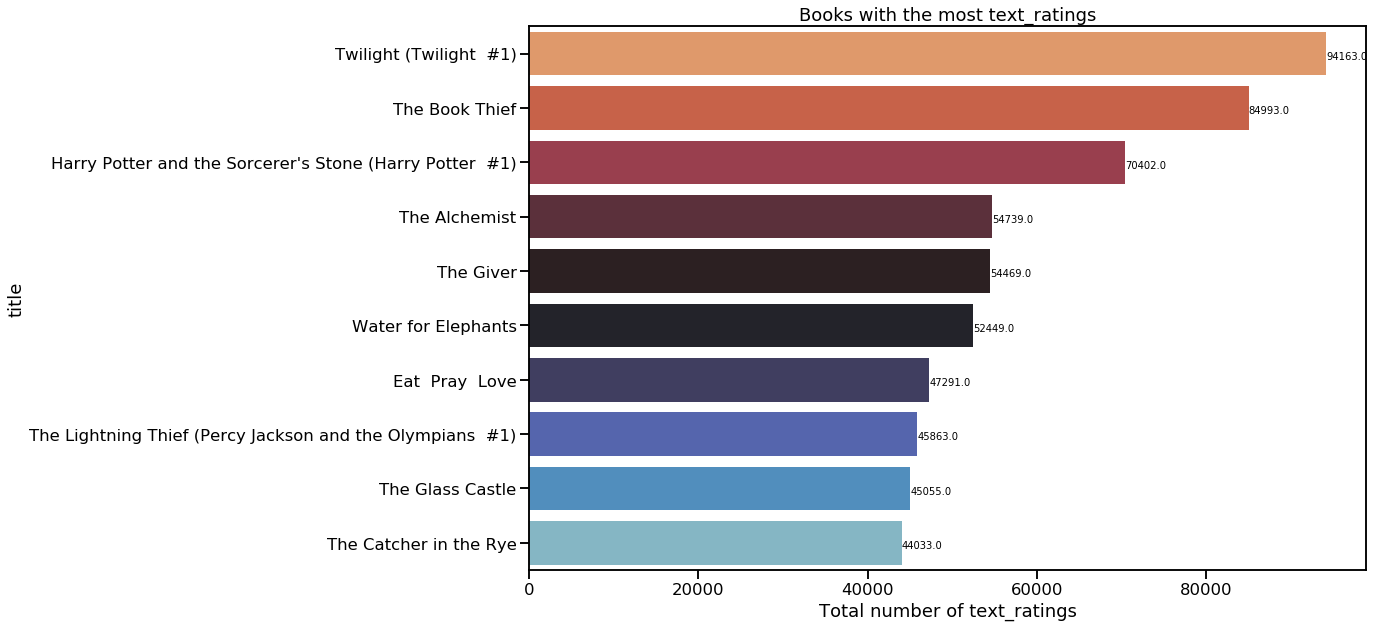

In [39]:
# we can also consider the text reviews count because this would mean the readers took some of their time to review .

sns.set_context('talk')
most_pages = df.groupby('title')['text_reviews_count'].sum().reset_index().sort_values('text_reviews_count', ascending = False).head(10).set_index('title')

plt.figure(figsize=(15,10))
ax = sns.barplot(most_pages['text_reviews_count'], most_pages.index, palette='icefire_r')
ax.set_title("Books with the most text_ratings")
ax.set_xlabel("Total number of text_ratings")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')
    
    

# interesting as the book with the top rating review count is not the one with the highest number of text_reviews_count


In [40]:
df['authors'].value_counts().head(10)

Agatha Christie                69
Stephen King                   66
Orson Scott Card               48
Rumiko Takahashi               45
P.G. Wodehouse                 42
Terry Brooks                   39
Piers Anthony                  34
Margaret Weis-Tracy Hickman    33
Dan Simmons                    32
Gabriel García Márquez         31
Name: authors, dtype: int64

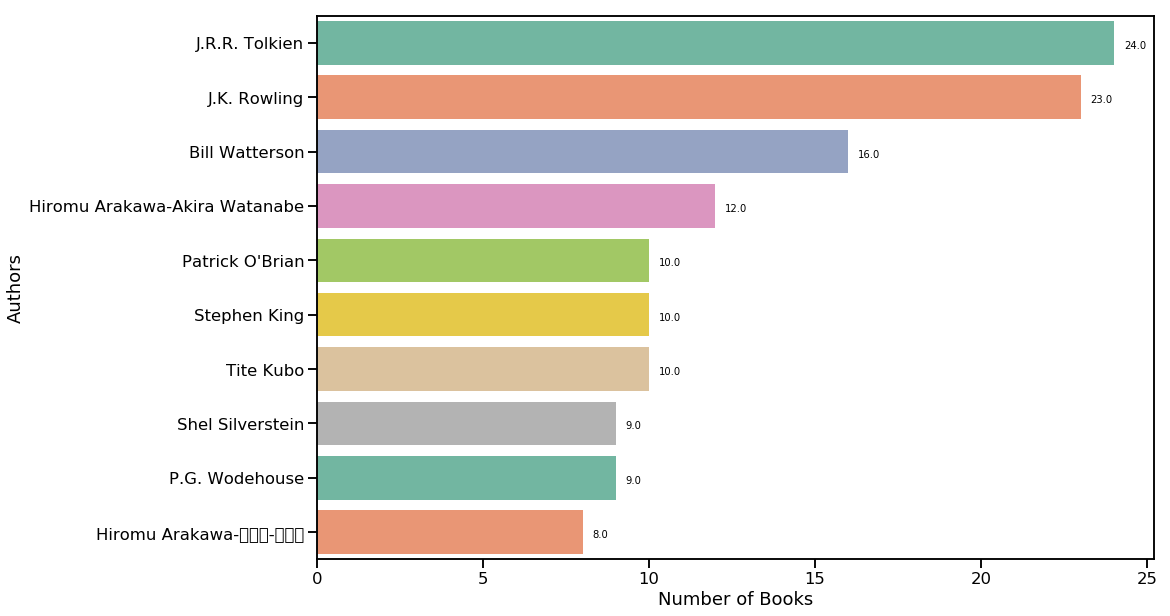

In [46]:
# we can check for the most highly rated authors.

high_rated_author = df[df['average_rating']>=4.3]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

In [52]:
# we now define a function to classify our data.

def classification(data):
    values = []
    for val in data.average_rating:
        if val>=0 and val<=1:
            values.append("Between 0 and 1")
        elif val>1 and val<=2:
            values.append("Between 1 and 2")
        elif val>2 and val<=3:
            values.append("Between 2 and 3")
        elif val>3 and val<=4:
            values.append("Between 3 and 4")
        elif val>4 and val<=5:
            values.append("Between 4 and 5")
        else:
            values.append("NaN")
    print(len(values))
    return values


In [53]:
df.dropna(0, inplace=True)

13516


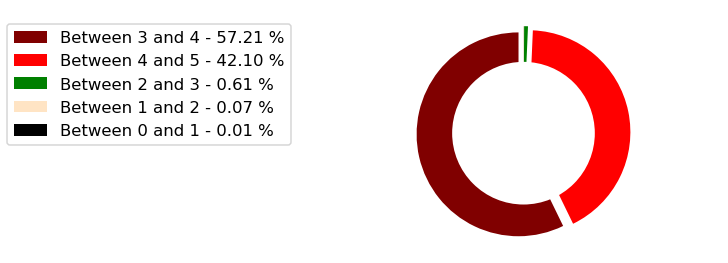

In [59]:
# we then write a function to classify out data in each of the above bins and slot it.

df['Ratings_Dist'] = classification(df)
ratings_pie = df['Ratings_Dist'].value_counts().reset_index()
labels = ratings_pie['index']
colors = ['maroon','red','green','bisque', 'black']
percent = 100.*ratings_pie['Ratings_Dist']/ratings_pie['Ratings_Dist'].sum()
fig, ax1 = plt.subplots()
ax1.pie(ratings_pie['Ratings_Dist'],colors = colors,pctdistance=0.85, startangle=90, explode = (0.05, 0.05, 0.05, 0.05, 0.05))

#Draw a circle now:
centre_circle = plt.Circle((0,0), 0.70, fc ='white')
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
#Equal Aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
plt.legend( labels, loc = 'best',bbox_to_anchor=(-0.1, 1.),)

In [60]:
# from above graph we can see the distribution of the ratings.most readers rated between 3 and 4